## predict new images

In [1]:
import sys
sys.path.append('../')

import os
from PIL import Image
from glob import glob
import torch
import pandas as pd
from pathlib import Path  
import warnings
warnings.filterwarnings("ignore")

from watermarkmodel.model import get_watermarks_detection_model, get_convnext_model
from watermarkmodel.model.predictor import WatermarksPredictor
from watermarkmodel.utils import list_images

* load model for testing

In [2]:
model, transforms = get_watermarks_detection_model('convnext-tiny', pretrained=True, device=torch.device('cpu'),
fp16=False, cache_dir='../watermarkmodel/model/models')

* create mode pickle

In [38]:
import pickle

#save model to flask
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
print('done')

done


In [39]:
def predict(imagefile): #config
    ##loading the model from the saved file
    pkl_filename = "model.pkl"
    with open(pkl_filename, 'rb') as f_in:
        model = pickle.load(f_in)
    # if type(config) == dict:
    #     img = pd.DataFrame(config)
    # else:
    #     img = config
    predictor = WatermarksPredictor(model, transforms, 'cpu')
    prediction = predictor.predict_image(Image.open(imagefile))
    #prediction = model.predict(imagefile)

    if prediction == 1:
        return('watermark')
    else:
        return('non_watermark')

res = predict('../watermarkmodel/flask-api/sample_image/wm1.jpg')
res

FileNotFoundError: [Errno 2] No such file or directory: '/Users/atsiri/Documents/GitHub/atsiri/codingtest/watermarkmodel/flask-api/sample_image/wm1.jpg'

* load test images

In [36]:
images = list_images('../images/test_images/')  #('../images/test_sample/')
len(images)

15

## bulk prediction

In [37]:
import warnings
warnings.filterwarnings("ignore")

predictor = WatermarksPredictor(model, transforms, 'cpu')
result = predictor.run(images)
result

  0%|          | 0/2 [00:00<?, ?it/s]/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1]

In [6]:
df_testcsv = pd.read_csv('../dataset/test_data_v1.csv')
df_testcsv['filename'] = df_testcsv['path'].apply(os.path.basename)

df_testresult = pd.DataFrame(list(zip(images, result)), columns=['path', 'prediction'])
df_testresult['filename'] = df_testresult['path'].apply(os.path.basename)

df_result = df_testcsv.merge(df_testresult, left_on='filename', right_on='filename')[['filename', 'label', 'prediction']]
df_result

,filename,label,prediction
0,bZLiwU5tEpXCZ6af.jpg,0,0
1,ZgBqRHo3EIwBE5Sx.jpg,0,0
2,GSdGPBGUpDlHtFB3.jpg,0,0
3,fOZiLOQwSxZdxwRl.jpg,1,1
4,8rTYBEpXxadDIsqN.jpg,0,0
5,zaSr0PPy8Ozb5j91.jpg,0,0
6,Szndo6wJr7r6c142.jpg,0,0
7,X8rMOlzQ5VhObWBA.jpg,0,0
8,635Jvu8SQ7hfRVb9.jpg,1,0
9,cLAoxiZ092kU74de.jpg,1,1


In [7]:
accuracy = df_result[df_result.label == df_result.prediction]['filename'].count() / len(df_result) * 100
print('accuracy :', accuracy, '%') 

accuracy : 92.3076923076923 %


## single file detection

watermark


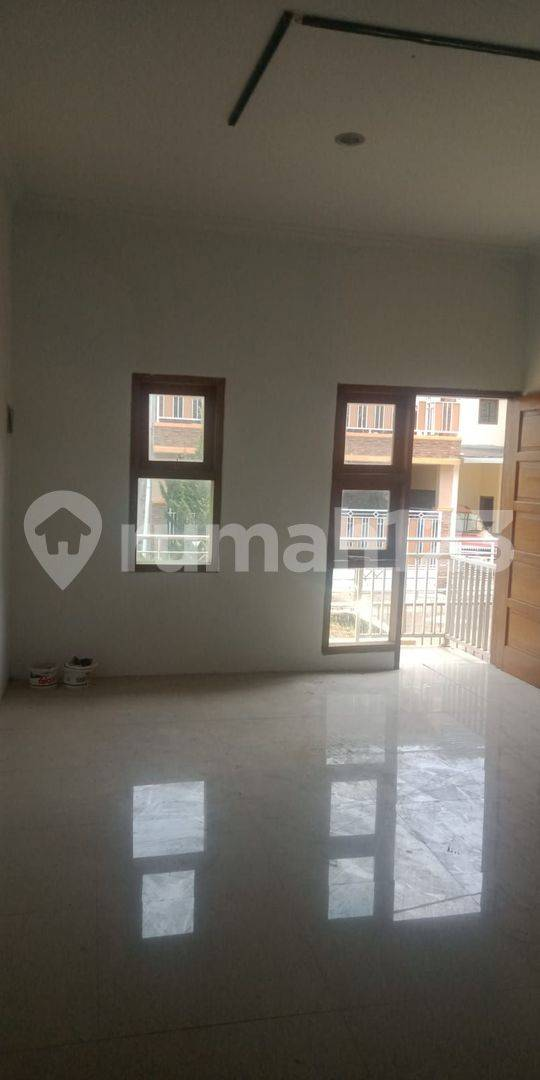

In [8]:
predictor = WatermarksPredictor(model, transforms, 'cpu')
prediction = predictor.predict_image(Image.open(images[4]))
print(prediction)
Image.open(images[4])